In [1]:
wsi_json_dir = "/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6"

In [2]:
!export LD_PRELOAD=/usr/lib/aarch64-linux-gnu/libffi.so.7

In [3]:
import os, glob, numpy as np, pandas as pd, json
from pathlib import Path
import matplotlib.pyplot as plt
import cv2, imageio
from scipy.interpolate import Rbf
import tqdm
import seaborn as sns

from slide_detect_tools.slide_grid_patch import SdpcReader


In [4]:
heatmaps = glob.glob(os.path.join(wsi_json_dir, "*.npy"))
heatmaps.sort()
jsons = glob.glob(os.path.join(wsi_json_dir, "*.json"))
jsons.sort()
print(len(heatmaps), len(jsons))
wsi_root = "/nasdata/dataset/BD_testset"
save_root = wsi_json_dir

30 30


In [5]:
def draw_boxes(img, pred, score_threshold=0.4, offset=[0, 0]):
    labels = pred["labels"]
    scores = pred["scores"]
    bboxes = pred["bboxes"]
    
    for label, score, bbox in zip(labels, scores, bboxes):
        if score > score_threshold:
            x1, y1, x2, y2 = list(map(int, bbox))
            
            x1 += offset[0]
            x2 += offset[0]
            y1 += offset[1]
            y2 += offset[1]
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

            # 添加标注信息
            text = f"{label} {score:.3f}"
            cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
            
    

def plot_images_in_grid(images, rows, cols, titles=[], grid_title=None, show=True):
    
    fig, axes = plt.subplots(rows, cols, figsize=(rows * 5, cols * 5))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_xticks([]), ax.set_yticks([])
            if titles:
                if len(titles) > i:
                    ax.set_title(titles[i], fontsize=10, pad=5)

    if grid_title:
        fig.suptitle(grid_title, fontsize=16)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.tight_layout(pad=0)
    plt.tight_layout()
    if show:
        plt.show()

In [6]:
idx = 2

30
30
Yes


  0%|          | 0/30 [00:00<?, ?it/s]

2023-1_Heatmap_Sampled_2000 2023-1


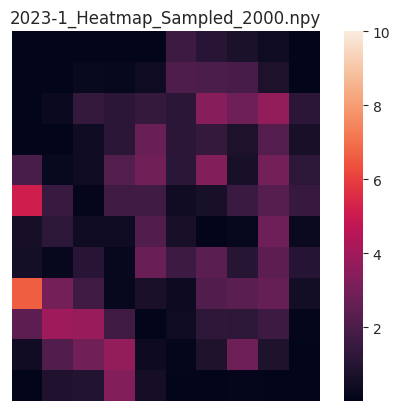

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-1_heatmap.jpg


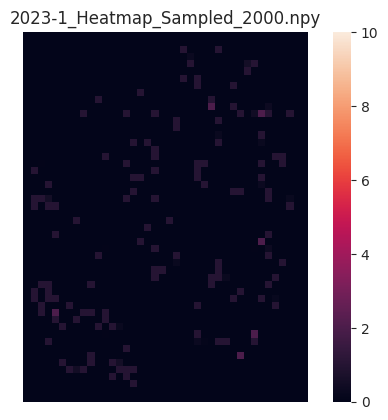

  3%|▎         | 1/30 [00:24<11:55, 24.67s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-1_heatmap_patch_level.jpg
6.62618328159616
2023-12-BD2_Heatmap_Sampled_1190 2023-12-BD2


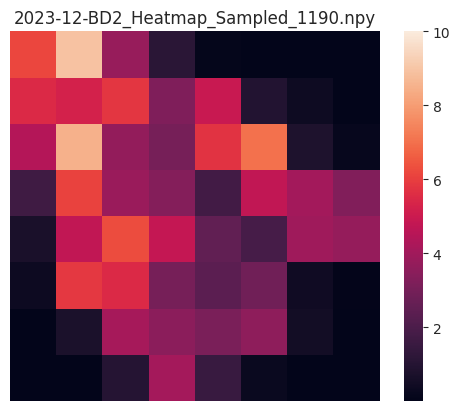

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-12-BD2_heatmap.jpg


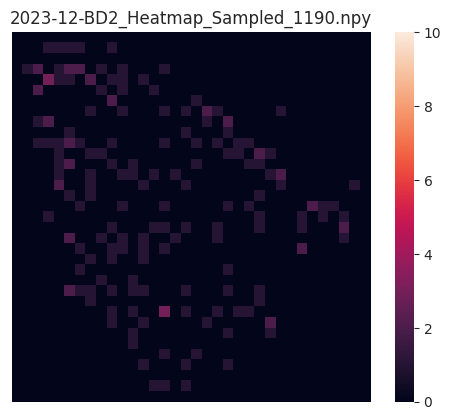

  7%|▋         | 2/30 [00:46<10:50, 23.25s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-12-BD2_heatmap_patch_level.jpg
8.922418148400597
2023-14-BD2_Heatmap_Sampled_2000 2023-14-BD2


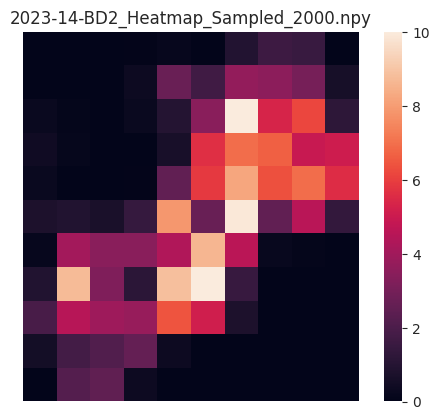

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-14-BD2_heatmap.jpg


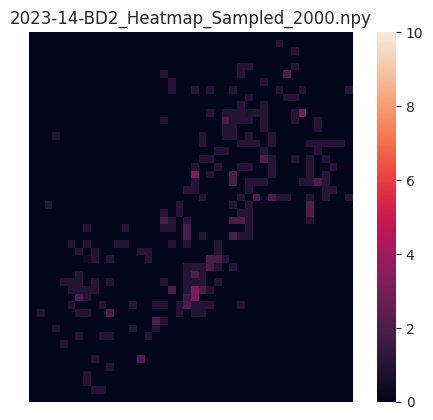

 10%|█         | 3/30 [01:09<10:21, 23.01s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-14-BD2_heatmap_patch_level.jpg
14.141330790394052
2023-16-BD2_Heatmap_Sampled_2000 2023-16-BD2


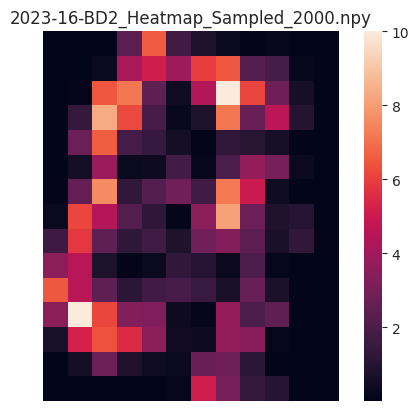

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-16-BD2_heatmap.jpg


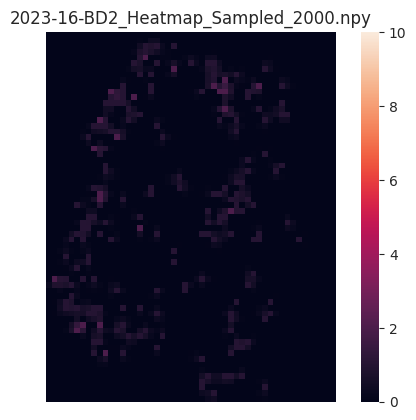

 13%|█▎        | 4/30 [01:33<10:07, 23.37s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-16-BD2_heatmap_patch_level.jpg
11.446290466373714
2023-17-BD0_Heatmap_Sampled_2000 2023-17-BD0


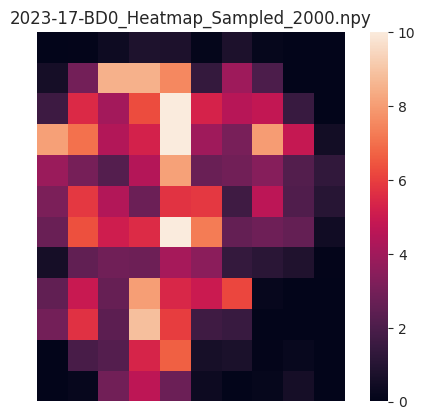

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-17-BD0_heatmap.jpg


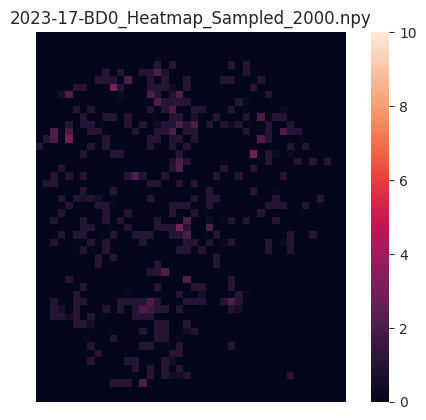

 17%|█▋        | 5/30 [01:57<09:49, 23.58s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-17-BD0_heatmap_patch_level.jpg
14.159347757684536
2023-18-BD1_Heatmap_Sampled_2000 2023-18-BD1


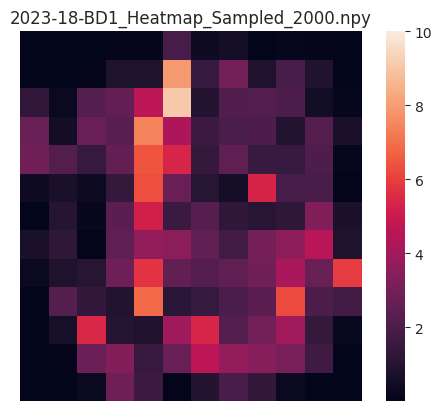

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-18-BD1_heatmap.jpg


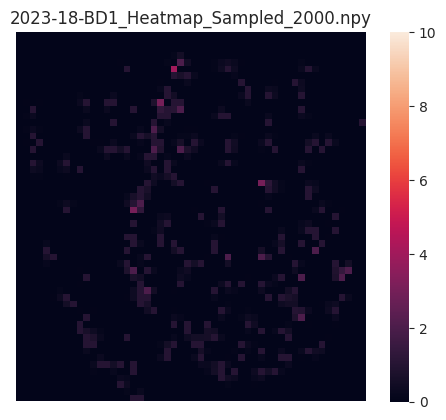

 20%|██        | 6/30 [02:23<09:42, 24.29s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-18-BD1_heatmap_patch_level.jpg
9.07745337209112
2023-2-BD3_Heatmap_Sampled_2000 2023-2-BD3


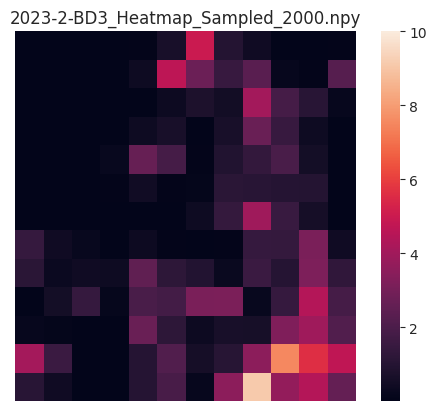

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-2-BD3_heatmap.jpg


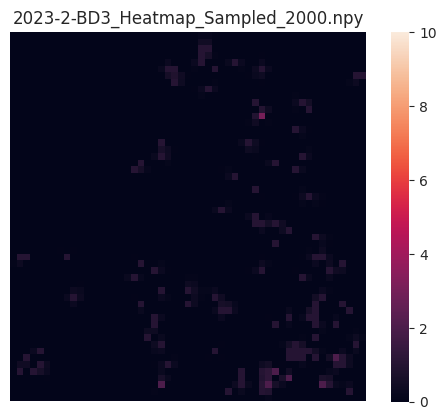

 23%|██▎       | 7/30 [02:45<09:07, 23.79s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-2-BD3_heatmap_patch_level.jpg
9.136335134272
2023-20-BD2_Heatmap_Sampled_1380 2023-20-BD2


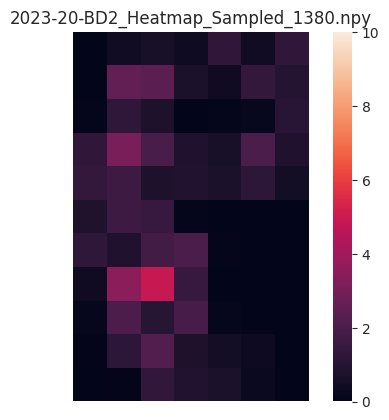

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-20-BD2_heatmap.jpg


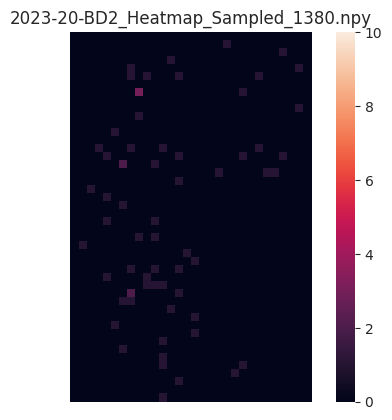

 27%|██▋       | 8/30 [03:08<08:31, 23.24s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-20-BD2_heatmap_patch_level.jpg
4.90161536121745
2023-21-BD2_Heatmap_Sampled_1845 2023-21-BD2


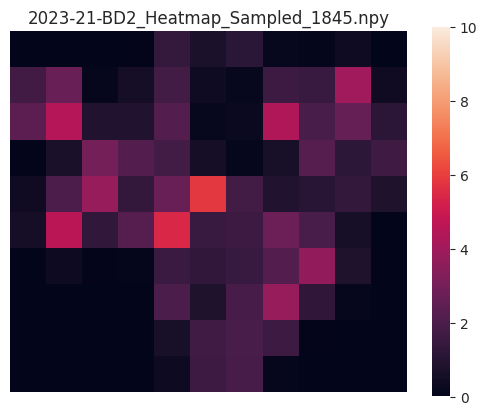

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-21-BD2_heatmap.jpg


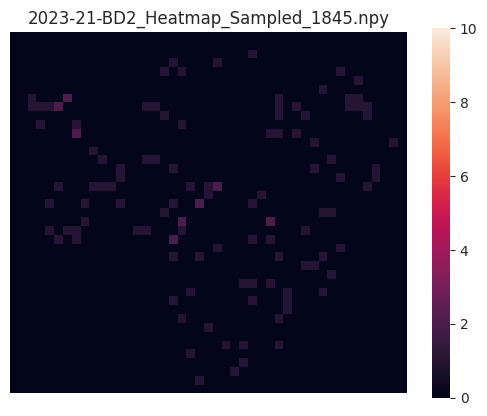

 30%|███       | 9/30 [03:31<08:06, 23.19s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-21-BD2_heatmap_patch_level.jpg
5.8350712752701135
2023-22-BD1_Heatmap_Sampled_875 2023-22-BD1


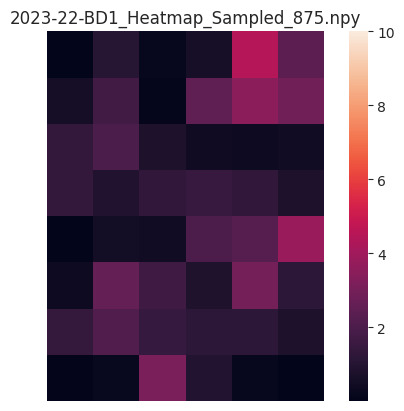

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-22-BD1_heatmap.jpg


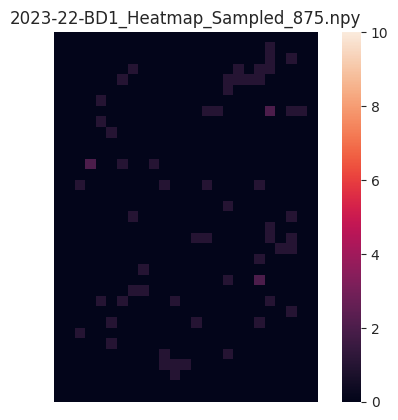

 33%|███▎      | 10/30 [03:53<07:36, 22.84s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-22-BD1_heatmap_patch_level.jpg
4.487084574314092
2023-23-BD3_Heatmap_Sampled_2000 2023-23-BD3


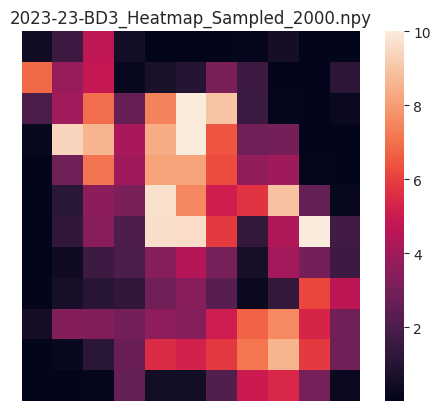

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-23-BD3_heatmap.jpg


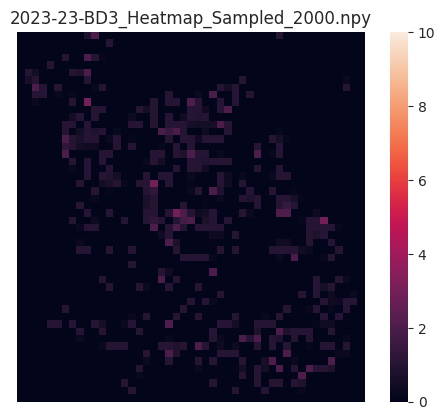

 37%|███▋      | 11/30 [04:17<07:25, 23.45s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-23-BD3_heatmap_patch_level.jpg
11.848415105295631
2023-24-BD3_Heatmap_Sampled_2000 2023-24-BD3


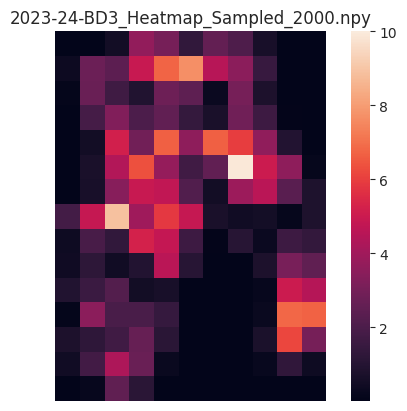

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-24-BD3_heatmap.jpg


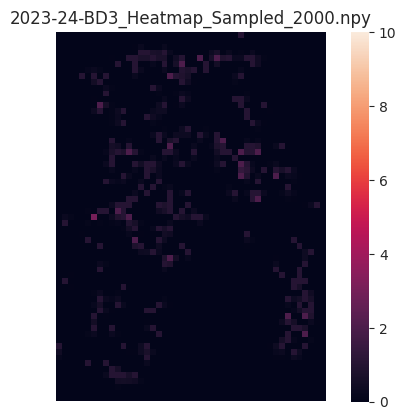

 40%|████      | 12/30 [04:42<07:05, 23.65s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-24-BD3_heatmap_patch_level.jpg
9.912342418914731
2023-25-BD1_Heatmap_Sampled_2000 2023-25-BD1


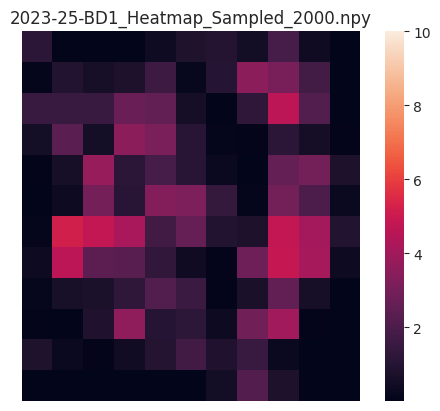

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-25-BD1_heatmap.jpg


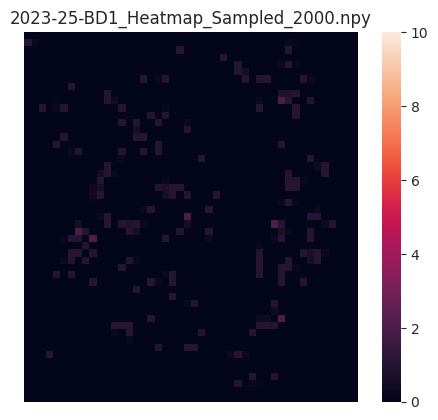

 43%|████▎     | 13/30 [05:07<06:50, 24.17s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-25-BD1_heatmap_patch_level.jpg
5.1945308893441995
2023-29-BD1_Heatmap_Sampled_2000 2023-29-BD1


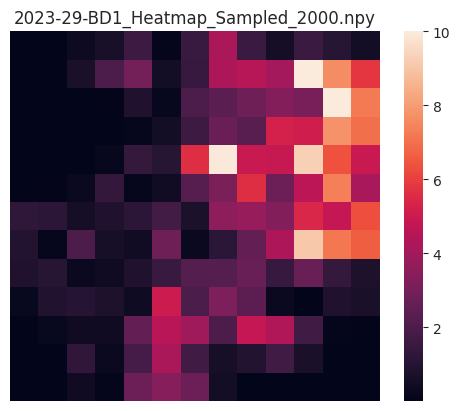

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-29-BD1_heatmap.jpg


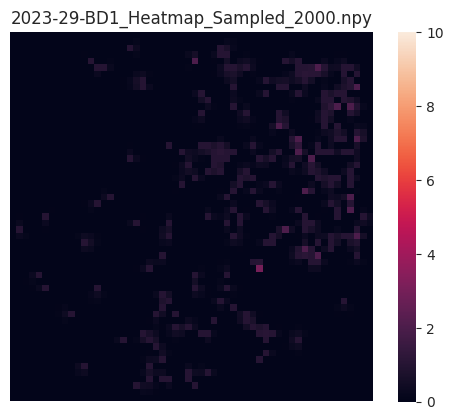

 47%|████▋     | 14/30 [05:31<06:27, 24.21s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-29-BD1_heatmap_patch_level.jpg
11.171111267221649
2023-3-BD3_Heatmap_Sampled_2000 2023-3-BD3


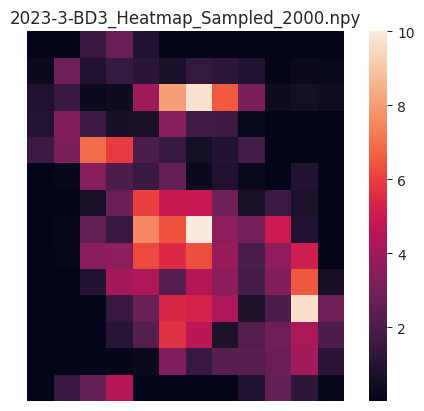

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-3-BD3_heatmap.jpg


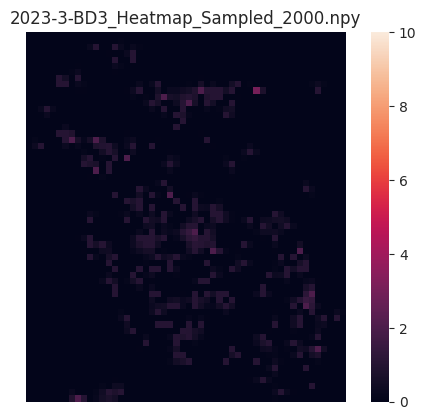

 50%|█████     | 15/30 [05:55<06:00, 24.07s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-3-BD3_heatmap_patch_level.jpg
12.087395536660573
2023-30-BD2_Heatmap_Sampled_2000 2023-30-BD2


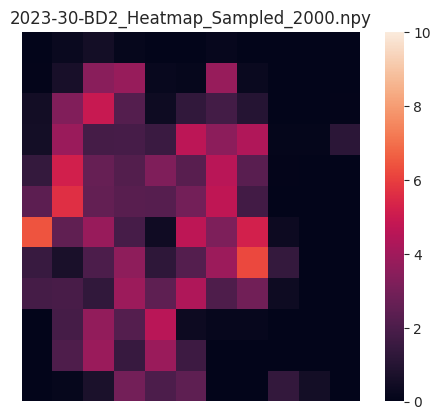

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-30-BD2_heatmap.jpg


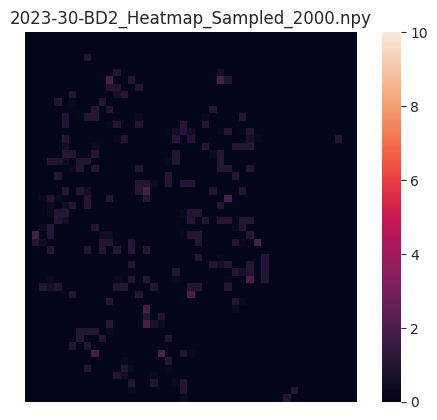

 53%|█████▎    | 16/30 [06:19<05:34, 23.91s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-30-BD2_heatmap_patch_level.jpg
6.435737282519385
2023-31-BD0_Heatmap_Sampled_2000 2023-31-BD0


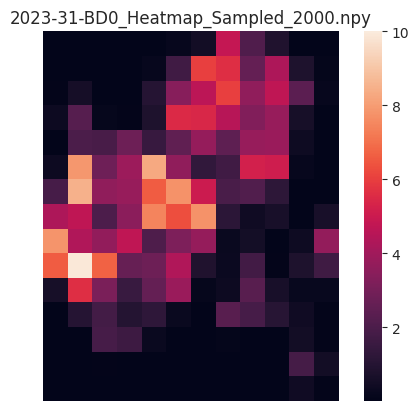

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-31-BD0_heatmap.jpg


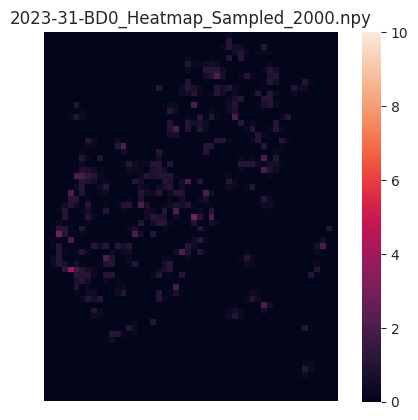

 57%|█████▋    | 17/30 [06:42<05:10, 23.90s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-31-BD0_heatmap_patch_level.jpg
9.915909069229038
2023-34-BD0_Heatmap_Sampled_2000 2023-34-BD0


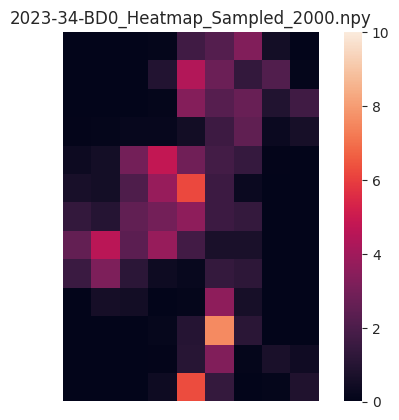

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-34-BD0_heatmap.jpg


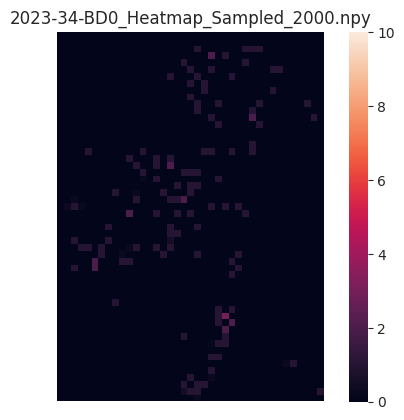

 60%|██████    | 18/30 [07:05<04:42, 23.52s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-34-BD0_heatmap_patch_level.jpg
7.573397480509871
2023-39-BD1_Heatmap_Sampled_1961 2023-39-BD1


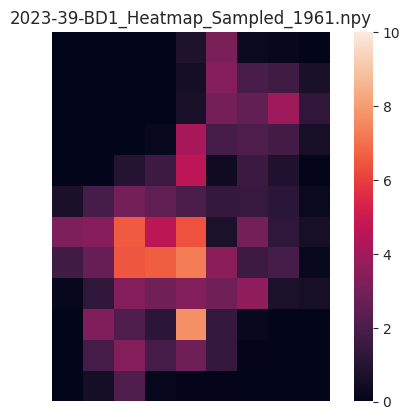

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-39-BD1_heatmap.jpg


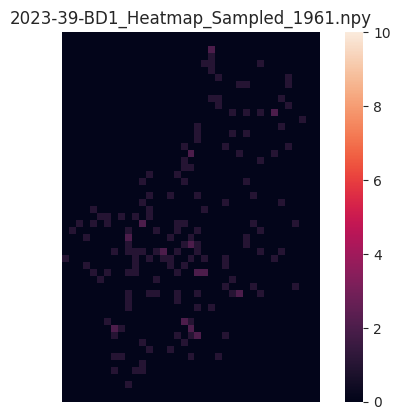

 63%|██████▎   | 19/30 [07:29<04:19, 23.58s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-39-BD1_heatmap_patch_level.jpg
7.6616145737259895
2023-4-BD3_Heatmap_Sampled_2000 2023-4-BD3


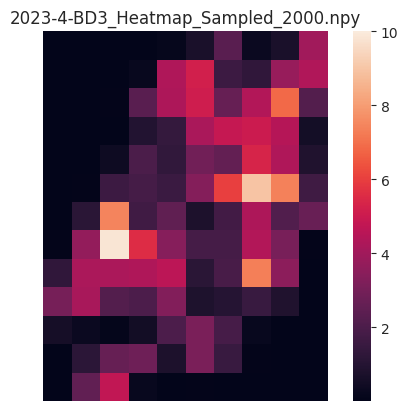

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-4-BD3_heatmap.jpg


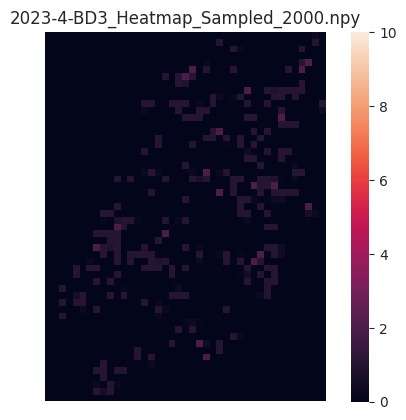

 67%|██████▋   | 20/30 [07:54<04:00, 24.07s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-4-BD3_heatmap_patch_level.jpg
9.815697339313965
2023-40-BD2_Heatmap_Sampled_1794 2023-40-BD2


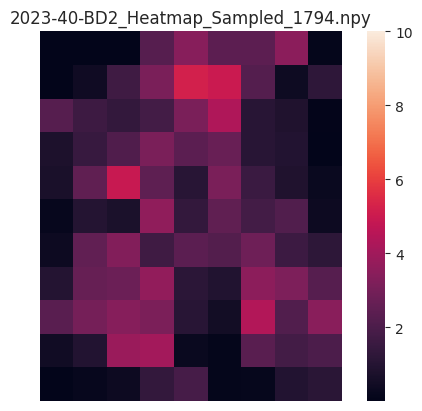

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-40-BD2_heatmap.jpg


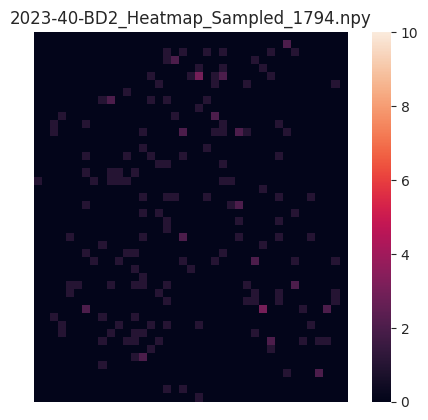

 70%|███████   | 21/30 [08:18<03:37, 24.16s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-40-BD2_heatmap_patch_level.jpg
5.2135065100934606
2023-41-BD2_Heatmap_Sampled_2000 2023-41-BD2


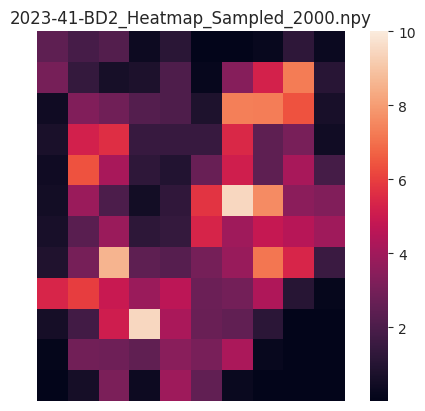

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-41-BD2_heatmap.jpg


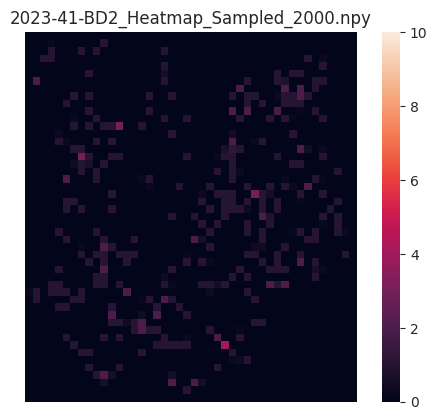

 73%|███████▎  | 22/30 [08:43<03:14, 24.28s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-41-BD2_heatmap_patch_level.jpg
9.49008242143736
2023-42-BD1_Heatmap_Sampled_1850 2023-42-BD1


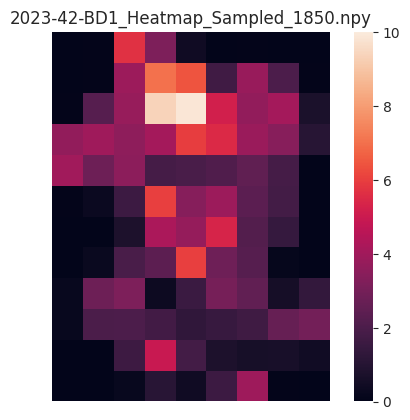

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-42-BD1_heatmap.jpg


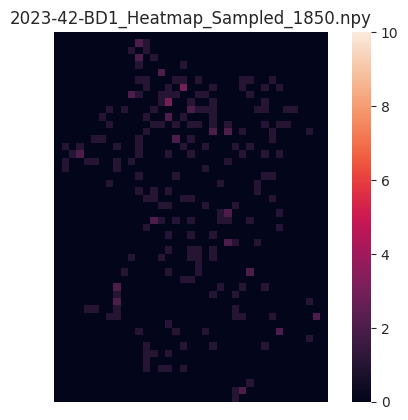

 77%|███████▋  | 23/30 [09:06<02:47, 23.96s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-42-BD1_heatmap_patch_level.jpg
9.851027983745958
2023-43-BD1_Heatmap_Sampled_2000 2023-43-BD1


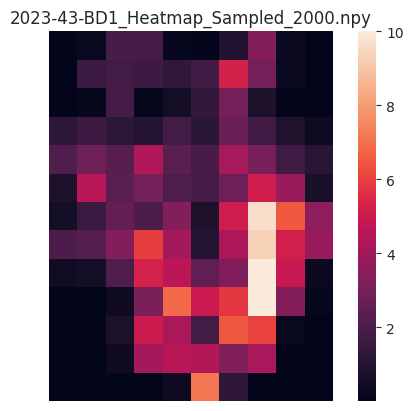

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-43-BD1_heatmap.jpg


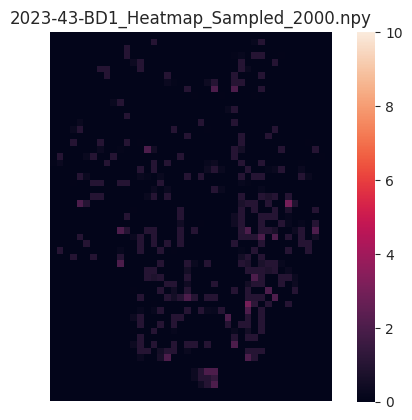

 80%|████████  | 24/30 [09:31<02:25, 24.28s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-43-BD1_heatmap_patch_level.jpg
11.740601644896941
2023-45-BD3_Heatmap_Sampled_2000 2023-45-BD3


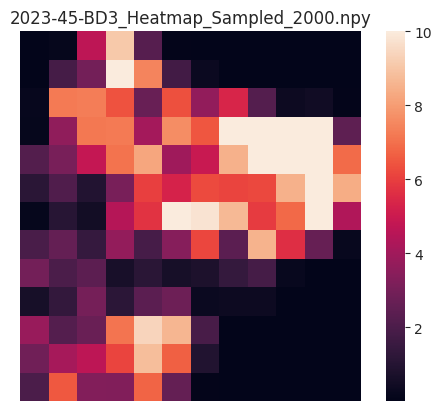

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-45-BD3_heatmap.jpg


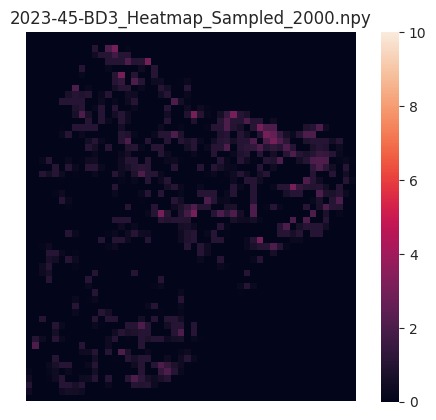

 83%|████████▎ | 25/30 [09:56<02:01, 24.38s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-45-BD3_heatmap_patch_level.jpg
20.73857091441822
2023-5-BD1_Heatmap_Sampled_2000 2023-5-BD1


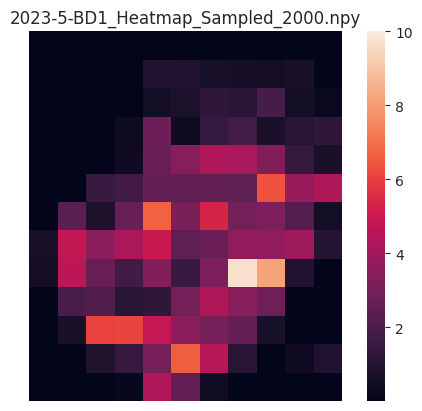

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-5-BD1_heatmap.jpg


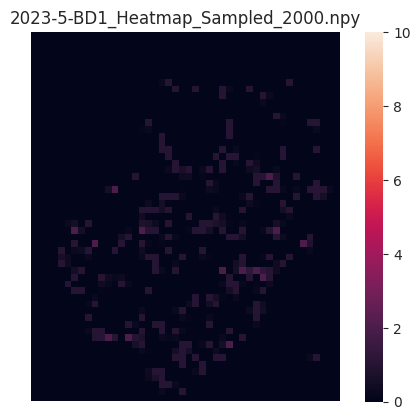

 87%|████████▋ | 26/30 [10:20<01:37, 24.40s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-5-BD1_heatmap_patch_level.jpg
9.725890080948663
2023-6-BD0_Heatmap_Sampled_2000 2023-6-BD0


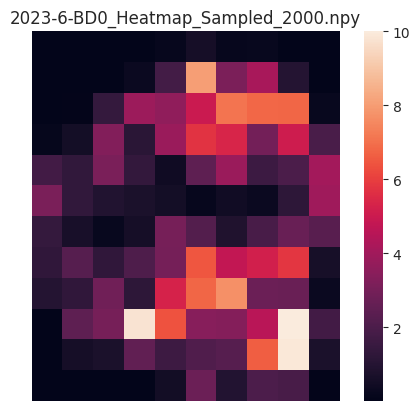

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-6-BD0_heatmap.jpg


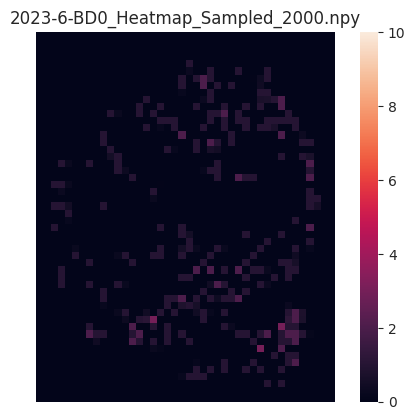

 90%|█████████ | 27/30 [10:45<01:13, 24.60s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-6-BD0_heatmap_patch_level.jpg
15.25351560355403
2023-7-BD1_Heatmap_Sampled_1980 2023-7-BD1


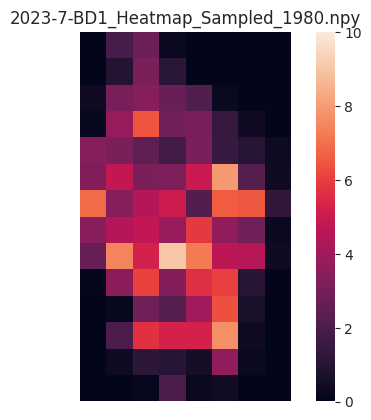

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-7-BD1_heatmap.jpg


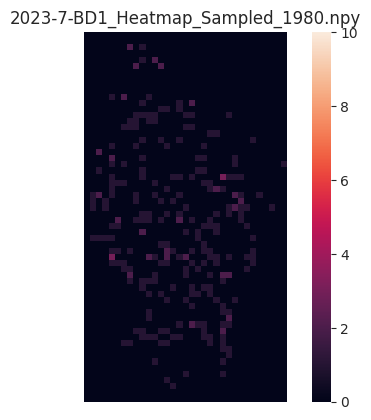

 93%|█████████▎| 28/30 [11:10<00:49, 24.56s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-7-BD1_heatmap_patch_level.jpg
9.006824826000202
2023-8-BD1_Heatmap_Sampled_2000 2023-8-BD1


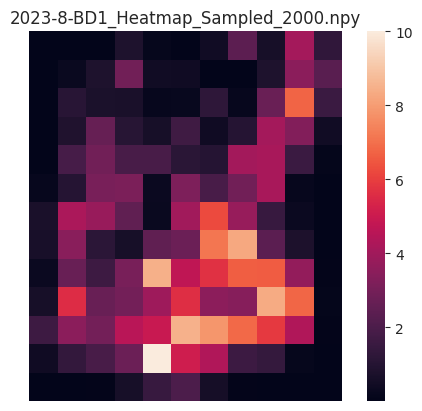

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-8-BD1_heatmap.jpg


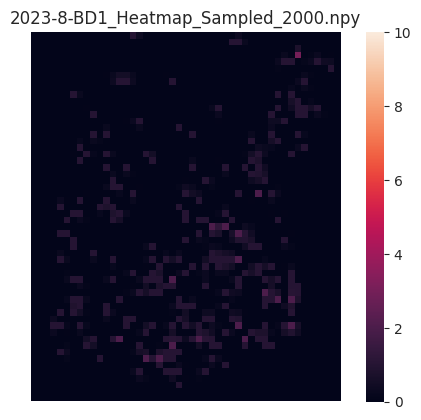

 97%|█████████▋| 29/30 [11:35<00:24, 24.79s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-8-BD1_heatmap_patch_level.jpg
10.20934690697284
2023-9-BD2_Heatmap_Sampled_2000 2023-9-BD2


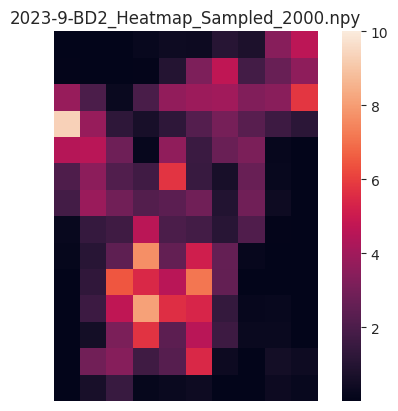

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-9-BD2_heatmap.jpg


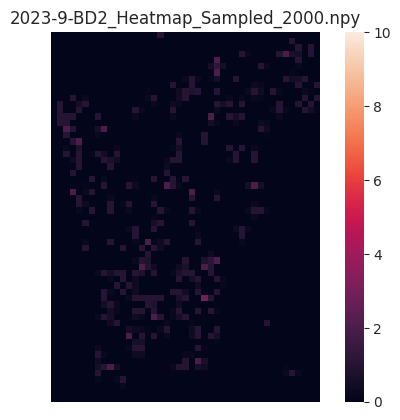

100%|██████████| 30/30 [12:00<00:00, 24.02s/it]

/nasdata2/private/zwlu/detection/TumorBuddingDetection/mmdetection/wsi_outputs_v6/2023-9-BD2_heatmap_patch_level.jpg
9.333401895637842


In [8]:
from copy import deepcopy
import math
import skimage
res = {
    
    "wsi_name": [],
    "count": []
    
}

score_threshold = 0.5
save_dataframe_only = False

print(len(jsons))
print(len(heatmaps))


id2heatmap = dict()
id2json = dict()

for heatmap in heatmaps:
    id_ = Path(heatmap).stem.split("_")[0]
    if id_ == "2023-1":
        print("Yes")
    id2heatmap[id_] = heatmap
    
for j in jsons:
    id_ = Path(j).stem.split("_")[0]
    id2json[id_] = j

for idx in tqdm.trange(len(jsons)):

    json_path = jsons[idx]
    id_ = Path(json_path).stem.split("_")[0]
    if id_ not in id2heatmap:
        continue
    heatmap0_path = id2heatmap[id_]
    print(Path(heatmap0_path).stem, Path(json_path).stem)

    cnt = 0
    sum_ = []
    topk = []

    a = 0.785 / (0.20 * 0.20 * 1024 * 1024 / 1000 / 1000)
    
    with open(json_path) as f:
        json_data = json.load(f)
        for img_pred, region in json_data:
            mean_conf = 1
            if img_pred:
                labels = np.array(img_pred["labels"])
                scores = np.array(img_pred["scores"])
                bboxes = np.array(img_pred["bboxes"])
            
                valide_idx = (labels == 0) & (scores > score_threshold)
                mean_conf = scores[valide_idx].mean() if len(scores[valide_idx]) > 0 else 0
                valide_bboxes = bboxes[valide_idx]
            else:
                valide_bboxes = []
            
            sum_ += [len(valide_bboxes)]
            cnt += 1
            topk.append([len(valide_bboxes), img_pred, region])

    topk.sort(key=lambda x: x[0], reverse=True)

    wsi_path = os.path.join(wsi_root, Path(json_path).stem + ".sdpc")
    if not save_dataframe_only:
        wsi = SdpcReader(wsi_path, {
                    "crop_pixel_size": 0.2,
                    "crop_size_h": 1024,
                    "crop_size_w": 1024,
                    "crop_overlap": 0
                })
        wsi.get_crop_region()

        images = []
        titles = []

        for i in range(16):
            tb_cnt, pred, rg = topk[i]
            crop_patchs = wsi.crop_patch(*rg)
            crop_patch = crop_patchs[0][1]
            draw_boxes(crop_patch, pred, score_threshold, offset=[-rg[0], -rg[1]])
            images.append(crop_patch)
            titles.append(f"At {rg}")

        wsi.close()

        plot_images_in_grid(images, 4, 4, titles, Path(json_path).name, show=False)
            
        plt.savefig(os.path.join(save_root, Path(json_path).stem + ".jpg"))
        plt.close()
    
        
        heatmap0 = np.load(heatmap0_path)
        available_idx = (heatmap0 >= 0)
        x = np.arange(heatmap0.shape[1])
        y = np.arange(heatmap0.shape[0])
        x,y = np.meshgrid(x, y)
        func = Rbf(x[available_idx], y[available_idx], heatmap0[available_idx], function='linear')

        heatmap0_new = func(x,y)

        heatmap0_new[heatmap0_new < 0] = 0
        
        h, w = heatmap0.shape[:2]
        patch_level = deepcopy(heatmap0_new)
        heatmap0_new = skimage.transform.resize(heatmap0_new * 18, (math.ceil(h / 4.43), math.ceil(w / 4.43)))
        
        with sns.axes_style("white"):
            ax = sns.heatmap(heatmap0_new, vmax=10, square=True)

        fig = ax.get_figure()
        plt.title(Path(heatmap0_path).name)
        
        plt.axis("off")
        plt.show()
        
        print(os.path.join(save_root, Path(json_path).stem + "_heatmap.jpg"))
        fig.savefig(os.path.join(save_root, Path(json_path).stem + "_heatmap.jpg"))
        
        with sns.axes_style("white"):
            ax = sns.heatmap(patch_level, vmax=10, square=True)

        fig = ax.get_figure()
        plt.title(Path(heatmap0_path).name)
        
        # ax.imshow(heatmap0_new)
        # print(heatmap0_new.max(), heatmap0_new.min())

        # print(heatmap0_new.mean() * 0.785 / (0.20 * 0.20 * 1024 * 1024 / 1000 / 1000))
        plt.axis("off")
        plt.show()
        
        print(os.path.join(save_root, Path(json_path).stem + "_heatmap_patch_level.jpg"))
        fig.savefig(os.path.join(save_root, Path(json_path).stem + "_heatmap_patch_level.jpg"))
        
        plt.close("all")
    
    a = 1
    sum_ = heatmap0_new.max()
    # # sum_.sort()
    # # sum_ = sum_[-19:]
    # m = np.array(sum_).mean()
    res["wsi_name"].append(Path(wsi_path).name)
    res["count"].append(sum_ * a)
    print(sum_ * a)
    
pd.DataFrame(res).to_csv(f"ModelRes_t{score_threshold:.2f}.csv", index=False)


In [ ]:

heatmap0_path = heatmaps[idx]
heatmap0 = np.load(heatmap0_path)
available_idx = (heatmap0 >= 0)
x = np.arange(heatmap0.shape[1])
y = np.arange(heatmap0.shape[0])
x,y = np.meshgrid(x, y)
func = Rbf(x[available_idx], y[available_idx], heatmap0[available_idx], function='linear')

heatmap0_new = func(x,y)

heatmap0_new[heatmap0_new < 0] = 0
print(heatmap0.shape)

print(heatmap0_new.shape)

plt.title(Path(heatmap0_path).name)
plt.imshow(heatmap0_new)
print(heatmap0_new.max(), heatmap0_new.min())

print(heatmap0_new.mean() * 0.785 / (0.20 * 0.20 * 1024 * 1024 / 1000 / 1000))
plt.axis("off")
plt.show()

